In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [5]:
X

array([[-0.02384472,  4.56877489],
       [ 4.56462577, -6.55109453],
       [ 5.4274982 , -6.9102879 ],
       ...,
       [ 3.62311398, -7.30873428],
       [-5.5958861 , -9.05966838],
       [-5.93120736, -8.32037902]], shape=(1000, 2))

In [6]:
y

array([0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0,

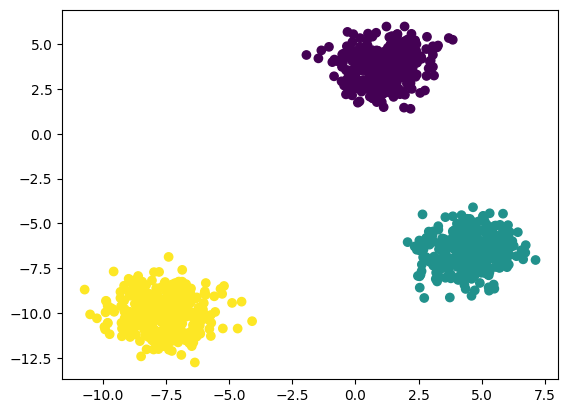

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## Standardization -- Feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
X_train_scaled

array([[ 0.39888995,  1.6110607 ],
       [ 0.39437082,  1.55553575],
       [ 0.00497753,  1.49850195],
       ...,
       [ 0.48028157,  1.4073118 ],
       [ 0.41688372,  1.27690213],
       [ 0.72402786, -0.52662207]], shape=(670, 2))

In [13]:
from sklearn.cluster import KMeans

In [14]:
## Elbow Method to select the k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1340.0000000000005,
 445.45745764255383,
 41.86105688191453,
 36.647655166693795,
 30.922687651153847,
 28.084342853462566,
 22.514181803965435,
 20.409933892864572,
 18.97819768285085,
 15.975207518058092]

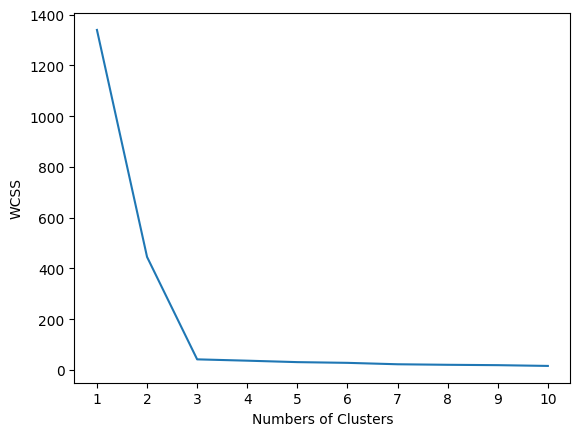

In [16]:
## Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

## Observation:
At the value of k=3 we can see that there are 3 clusters in our data.


In [17]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [18]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0,

In [19]:
y_pred = kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2,
       0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0,

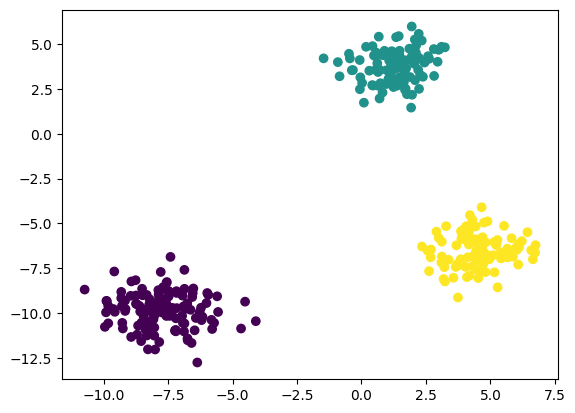

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
## Validation of K-Means clustering algorithm ( Validating K value)
    ## KnewwLocator
    ## Silhouette Score

In [24]:
## Kneelocator
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')

In [27]:
kl.elbow

np.int64(3)

In [28]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[0.6743562282243133,
 0.8438754544205942,
 0.6849567124855253,
 0.5103364553141368,
 0.516801021381287,
 0.3599987617995406,
 0.355974449169861,
 0.3555535493934245,
 0.3539382749484847]

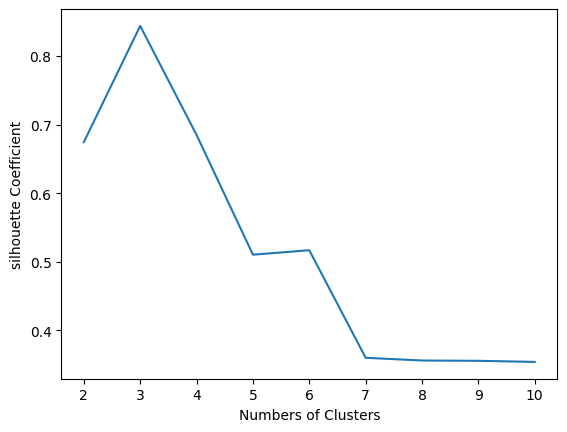

In [31]:
## Plotting Silhouette Score vs K Value
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("silhouette Coefficient")
plt.show()